In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys
sns.set_theme(style="whitegrid", font_scale=1.1)

sys.path.append("../EDA")
DATA_PATH = "../instruction/movieReplicationSet.csv"
ALPHA = 0.005

import movie_data_formatter as mdf
import movie_rating_gender as mrgy
import general_functions as gf

df = pd.read_csv(DATA_PATH)
df = mdf.clean_data(df)
processed_data = mdf.convert_to_table(df)
lion_king_data = processed_data[(processed_data['movie_name'] == 'The Lion King') & (processed_data['year'] == '1994')]

In [2]:
before_dropping_na = lion_king_data['are_you_an_only_child'].value_counts()
lion_king_data = lion_king_data[lion_king_data['are_you_an_only_child'] != -1.0] # remove NA values
after_dropping_na = lion_king_data['are_you_an_only_child'].value_counts() 

print("Before dropping NA values:")
print(before_dropping_na)
print("\nAfter dropping NA values:")
print(after_dropping_na)

Before dropping NA values:
are_you_an_only_child
 0.0    894
 1.0    177
-1.0     26
Name: count, dtype: int64

After dropping NA values:
are_you_an_only_child
0.0    894
1.0    177
Name: count, dtype: int64


In [3]:
# drop ratings with NA values
lion_king_data = lion_king_data.dropna(subset=['rating'])
lion_king_data.value_counts('are_you_an_only_child')

are_you_an_only_child
0.0    776
1.0    151
Name: count, dtype: int64

In [4]:
# since ratings are discrete and ordinal categories in this case
# we will transform them into ranks
ranks = stats.rankdata(lion_king_data['rating'], method='average')
lion_king_data['rating_rank'] = ranks
lion_king_data.head()

,report_id,movie_name,rating,year,tends_to_find_fault_with_others,does_a_thorough_job,is_depressedblue,is_originalcomes_up_with_new_ideas,is_reserved,is_helpful_and_unselfish_with_others,...,have_you_ever_parachuted,i_enjoy_haunted_houses,i_had_a_sheltered_upbringing,my_life_is_very_stressful,i_value_my_life_to_be_well_ordered_and_predictable,have_you_ridden_a_motorcycle,have_you_gambled_or_bet_for_money,have_you_ever_been_skydiving,is_talkative,rating_rank
220,1.0,The Lion King,4.0,1994,2.0,NaN,4.0,4.0,5.0,2.0,...,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,697.5
1020,3.0,The Lion King,4.0,1994,2.0,4.0,2.0,3.0,3.0,4.0,...,2.0,1.0,3.0,4.0,4.0,2.0,1.0,2.0,4.0,697.5
1420,4.0,The Lion King,3.0,1994,3.0,5.0,4.0,5.0,3.0,4.0,...,1.0,4.0,4.0,3.0,4.0,1.0,1.0,1.0,5.0,200.5
1820,5.0,The Lion King,4.0,1994,4.0,4.0,4.0,2.0,3.0,4.0,...,1.0,2.0,3.0,3.0,1.0,1.0,4.0,3.0,4.0,697.5
2220,6.0,The Lion King,4.0,1994,3.0,3.0,4.0,3.0,4.0,3.0,...,2.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0,1.0,697.5


In [5]:
only_child_group = lion_king_data[lion_king_data['are_you_an_only_child'] == 1]
not_only_child_group = lion_king_data[lion_king_data['are_you_an_only_child'] == 0]

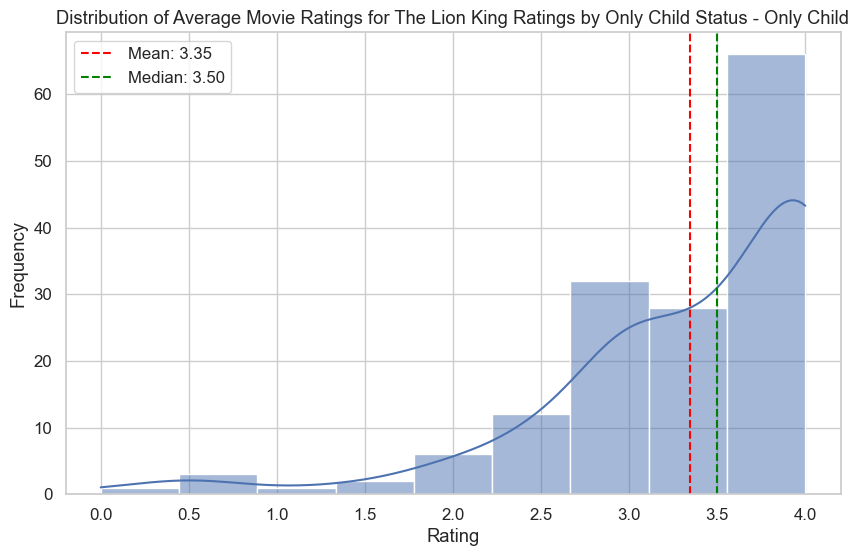

<module 'matplotlib.pyplot' from '/Users/paolacalle/Desktop/NYU/semesters/fall-2025/ds/projects/movie-ratings-replication/my_project_env/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [6]:
gf.plot_distrubtion(only_child_group,
    name='The Lion King Ratings by Only Child Status - Only Child',
    y='rating',
    bins=9)

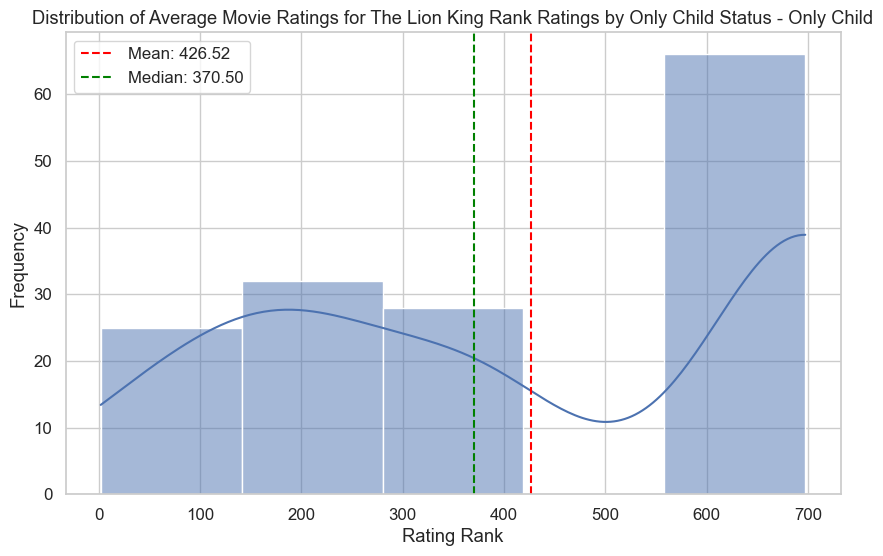

<module 'matplotlib.pyplot' from '/Users/paolacalle/Desktop/NYU/semesters/fall-2025/ds/projects/movie-ratings-replication/my_project_env/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [ ]:
gf.plot_distrubtion(only_child_group,
    name='The Lion King Rank Ratings by Only Child Status - Only Child',
    y='rating_rank',
    bins=5)

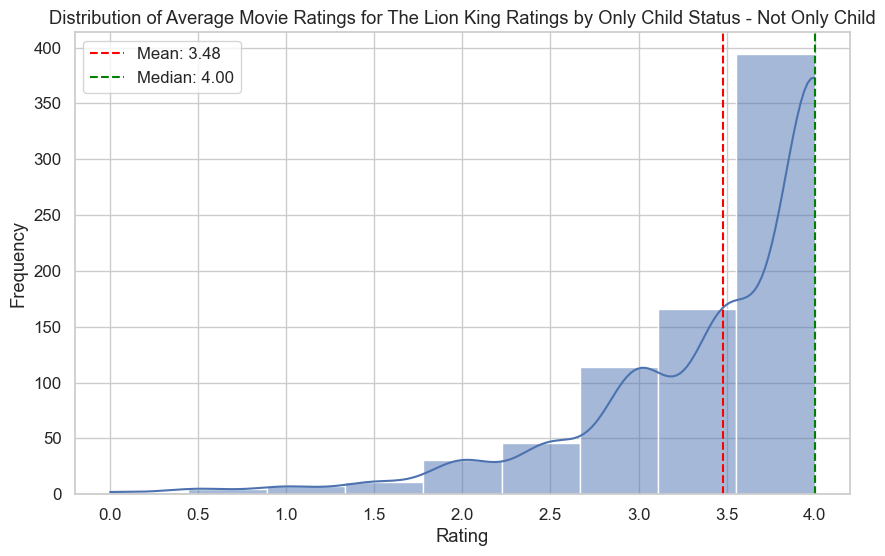

<module 'matplotlib.pyplot' from '/Users/paolacalle/Desktop/NYU/semesters/fall-2025/ds/projects/movie-ratings-replication/my_project_env/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [ ]:
gf.plot_distrubtion(not_only_child_group,
    name='The Lion King Ratings by Only Child Status - Not Only Child',
    y='rating',
    bins=9)

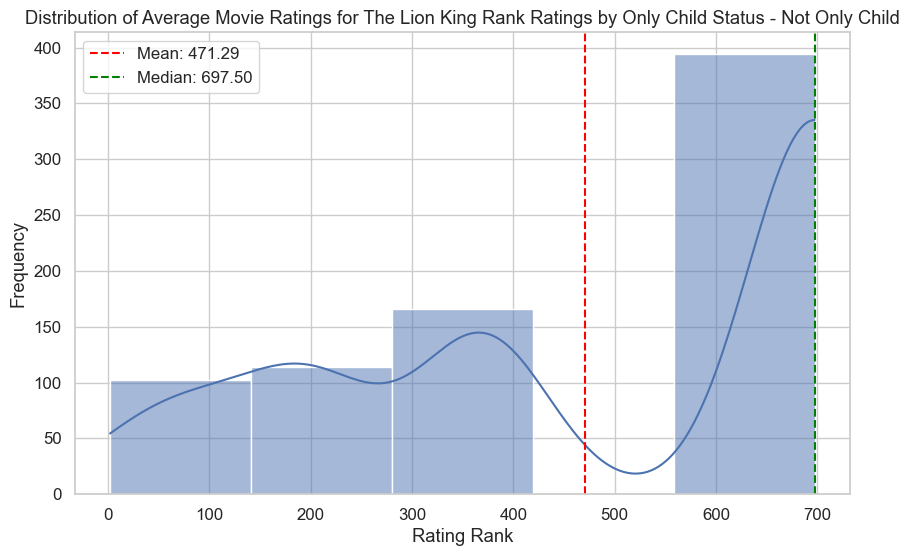

<module 'matplotlib.pyplot' from '/Users/paolacalle/Desktop/NYU/semesters/fall-2025/ds/projects/movie-ratings-replication/my_project_env/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [9]:
gf.plot_distrubtion(not_only_child_group,
    name='The Lion King Rank Ratings by Only Child Status - Not Only Child',
    y='rating_rank',
    bins=5)

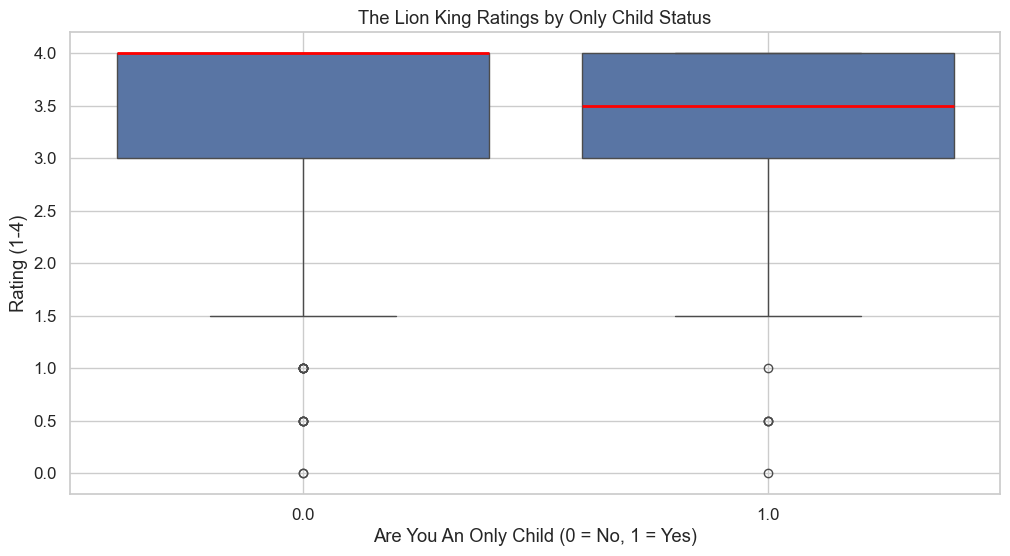

<module 'matplotlib.pyplot' from '/Users/paolacalle/Desktop/NYU/semesters/fall-2025/ds/projects/movie-ratings-replication/my_project_env/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [10]:
gf.plot_boxplot(lion_king_data,
    title='The Lion King Ratings by Only Child Status',
    x='are_you_an_only_child',
    y='rating',
    xlabel ='Are You An Only Child (0 = No, 1 = Yes)',
    ylabel ='Rating (1-4)')

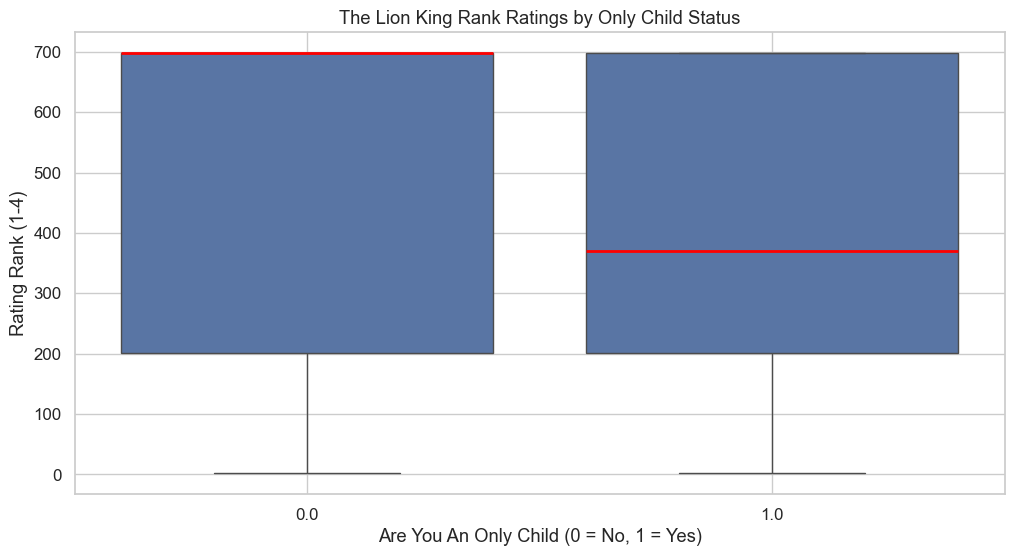

<module 'matplotlib.pyplot' from '/Users/paolacalle/Desktop/NYU/semesters/fall-2025/ds/projects/movie-ratings-replication/my_project_env/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [11]:
gf.plot_boxplot(lion_king_data,
    title='The Lion King Rank Ratings by Only Child Status',
    x='are_you_an_only_child',
    y='rating_rank',
    xlabel ='Are You An Only Child (0 = No, 1 = Yes)',
    ylabel ='Rating Rank (1-4)')

# Inferences

Mann–Whitney U test (a non-parametric test comparing the central tendency/rank distributions of two groups).

Null hypothesis (H0):
The rating distributions for only children and non-only children are the same.

Alternative hypothesis (H1):
Only children tend to give higher ratings than non-only children.

In [12]:

# perform Wilcoxon rank-sum test (Mann-Whitney U test)
# H0: The distributions of ratings for only children and non-only children are the same.
# H1: The distribution of ratings for only children is greater than that for non-only children
t_stat, p_value = stats.mannwhitneyu(
    only_child_group['rating'],
    not_only_child_group['rating'],
    alternative='greater',
    use_continuity=False
)

print(f"Wilcoxon rank-sum test results on ratings: statistic = {t_stat}, p-value = {p_value}")

Wilcoxon rank-sum test results on ratings: statistic = 52929.0, p-value = 0.9784098654550833


We performed a one-sided Wilcoxon rank-sum (Mann–Whitney U) test to assess whether only-child participants tend to assign higher ratings than non-only-child participants. The test statistic was U = 52,929, p = 0.978, leads us to not be able to drop the null.

### Opposite Direction Check
To explore the reverse hypothesis, let our alternative hypothesis now be only-child ratings are lower than non-only-child ratings. 

In [14]:

t_stat, p_value = stats.mannwhitneyu(
    only_child_group['rating'],
    not_only_child_group['rating'],
    alternative='less',
    use_continuity=False
)

print(f"Wilcoxon rank-sum test results on ratings: statistic = {t_stat}, p-value = {p_value}")

Wilcoxon rank-sum test results on ratings: statistic = 52929.0, p-value = 0.021590134544916692


The one-sided test returned U=52,929, p=0.0216. Since we are effectively testing two directional hypotheses, our overall significance threshold should be adjusted for multiple comparisons:

alpha_total = 0.005 + 0.005 = 0.01

Even under this relaxed two-sided equivalent, p=0.0216>0.01, so the result remains not statistically significant.

At the adjusted alpha = 0.01 level, we still fail to reject the null hypothesis.
There is no statistically meaningful difference in how only-child and non-only-child participants rate movies.